# Lab 1: Data Providers and Preprocessing

## Overview

Today's exercises introduce you to the `mlp` package and data handling for machine learning. You'll implement variants of a `DataProvider` class that preprocesses data and serves it in batches for training neural networks.

**Learning objectives:**
- Understand how data flows through the `mlp` package
- Implement data preprocessing and batch generation
- Work with real datasets (MNIST digits, weather data)
- Practice NumPy array manipulation and visualization

**Prerequisites:** If you're new to Python/NumPy, consider reviewing:
- [Stanford CS231n Python/NumPy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
- [Interactive Jupyter notebook version](https://github.com/kuleshov/teaching-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) (save to your `mlpractical/notebooks` directory)

## Data Providers

Data providers are classes that handle loading, preprocessing, and batching of datasets. Open the [`mlp.data_providers`](../mlp/data_providers.py) module in your browser to explore the code structure before starting the exercises.

### Exercise 1: MNIST Data Visualization

The `MNISTDataProvider` handles the [MNIST handwritten digit dataset](http://yann.lecun.com/exdb/mnist/), a standard machine learning benchmark. We'll use it to understand data loading and visualization.

**Troubleshooting:** If you get `KeyError: 'MLP_DATA_DIR'`, ensure you've set the environment variable correctly during setup and activated the `mlp` conda environment.

In [1]:
# Setup for notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mlp.data_providers as data_providers

# If you encounter import errors, uncomment and modify the line below:
# import sys; sys.path.append('/path/to/mlpractical')

def show_single_image(img, title="", fig_size=(3, 3)):
    """Display a single grayscale image."""
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    plt.show()
    return fig, ax

# Example: Display single MNIST images
print("Loading MNIST validation data...")
mnist_dp = data_providers.MNISTDataProvider(
    which_set='valid', batch_size=1, max_num_batches=3, shuffle_order=True)

print("Displaying sample images:")
for i, (inputs, targets) in enumerate(mnist_dp):
    # Reshape from 1D vector (784,) to 2D image (28, 28)
    image = inputs.reshape(28, 28)
    show_single_image(image, title=f'Digit: {targets[0]} (Image {i+1})')
    
print("✓ Single image visualization complete")

ModuleNotFoundError: No module named 'mlp'

### Task 1: Batch Visualization

Now you'll work with batches of images rather than single examples.

**Your task:**
- Create an MNIST data provider that loads **5 batches** of **100 images** each
- Display each batch as a **10×10 grid** of images
- Print the batch number and first few target labels for each batch

**Key concepts:**
- **Batch processing:** Neural networks typically process multiple examples simultaneously for efficiency
- **Data shapes:** 
  - `inputs`: shape `(batch_size, input_dim)` = `(100, 784)`
  - `targets`: shape `(batch_size,)` = `(100,)`
  - Each image: 784 pixels = 28×28 flattened
- **Preprocessing:** Images are normalized to [0,1] from original [0,255] values

**Implementation hints:**
1. Use `batch_size=100` and `max_num_batches=5`
2. Reshape input vectors: `inputs.reshape(batch_size, 28, 28)`
3. Create a 10×10 grid: `int(batch_size**0.5)` gives you the grid size
4. Use `plt.subplots()` for cleaner plotting code

**Expected output:** 5 image grids, each showing 100 handwritten digits arranged in a 10×10 pattern.

Loading 5 batches of 100 images each...


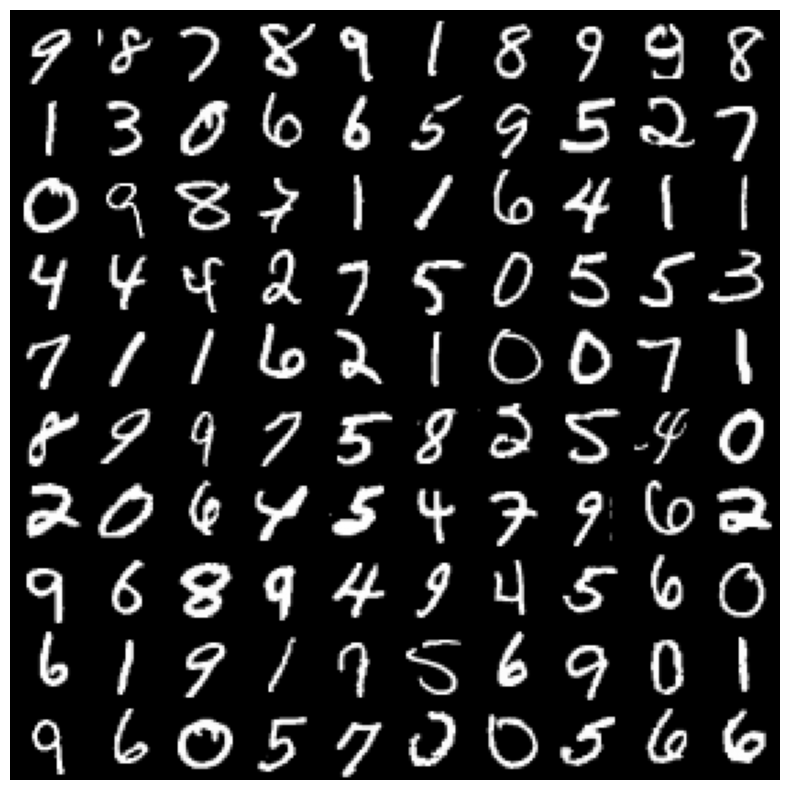

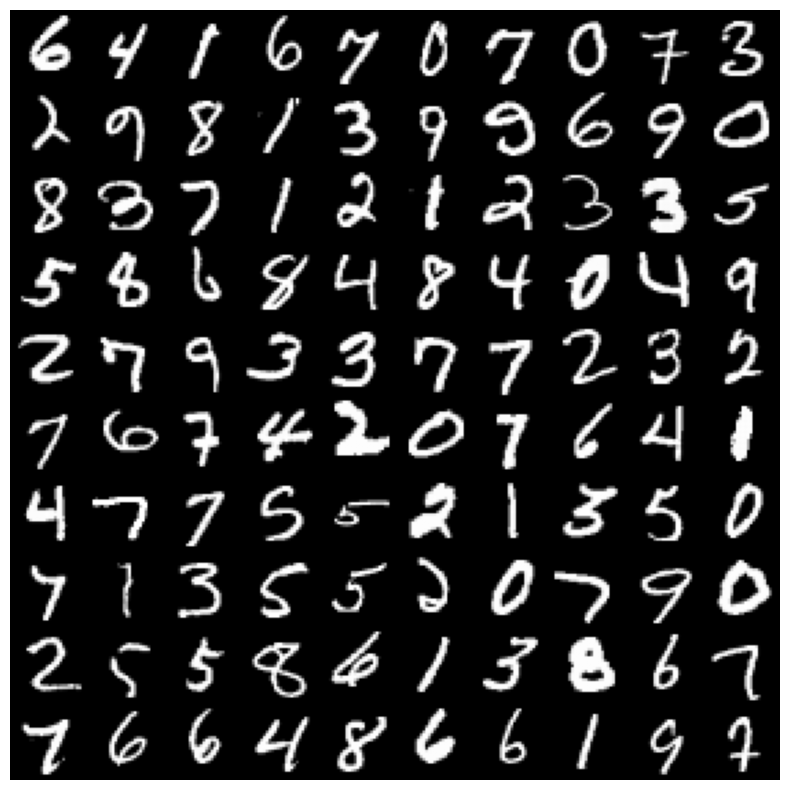

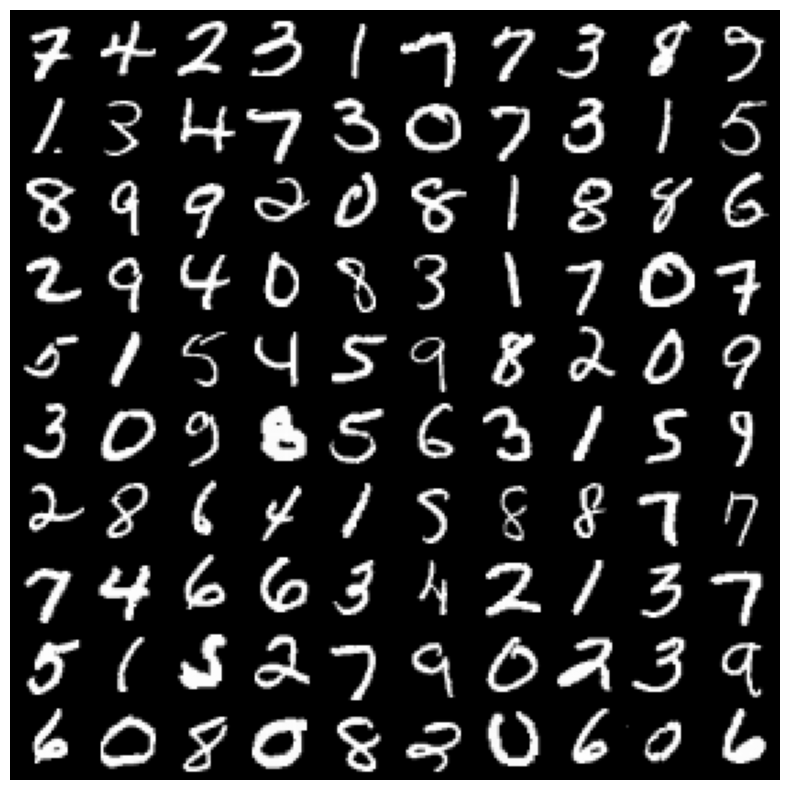

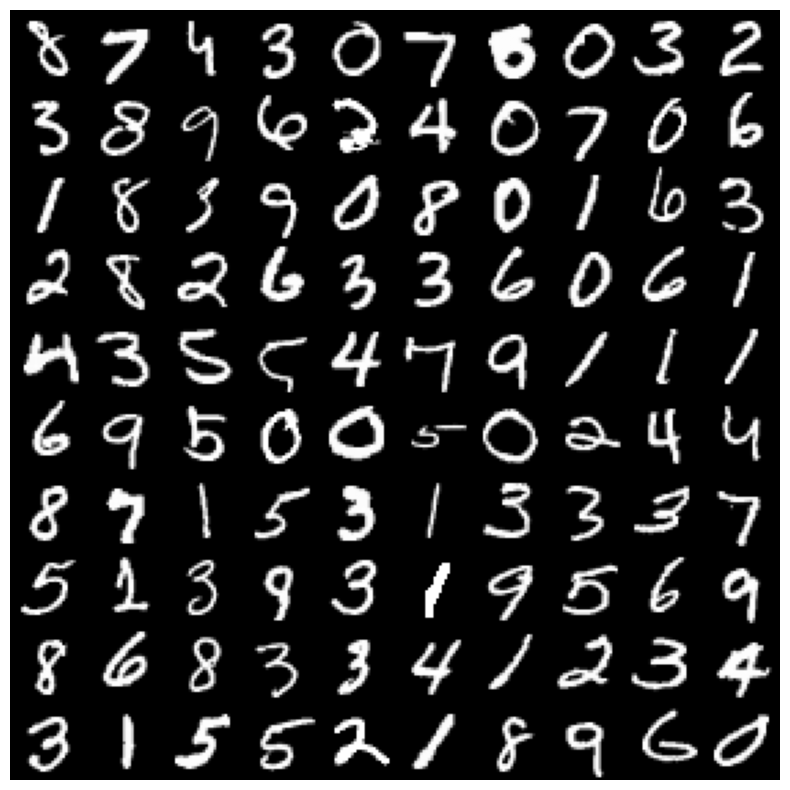

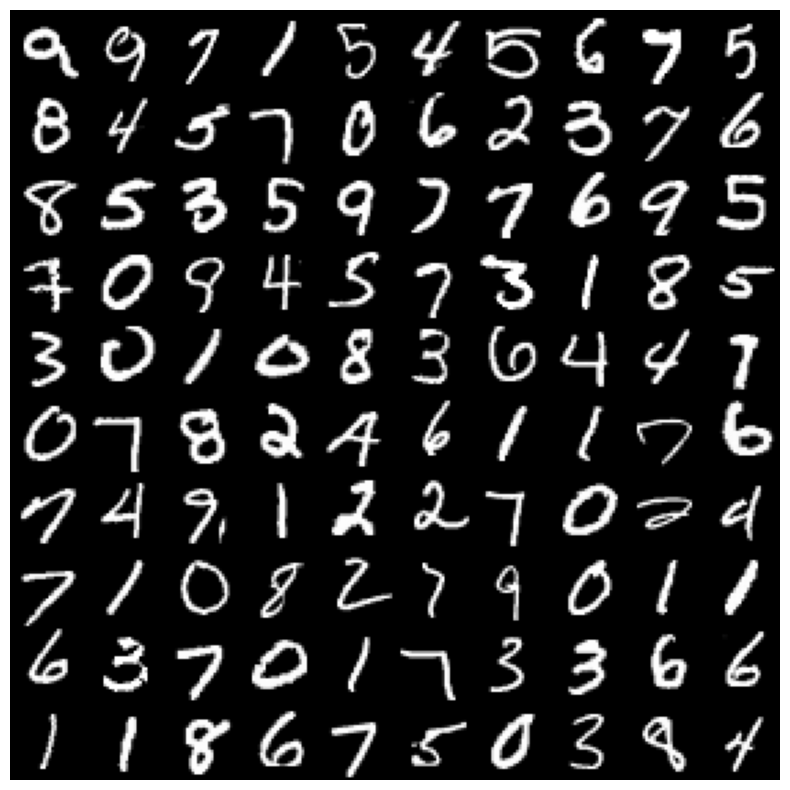


 Batch visualization complete!


In [2]:
# SOLUTION: Batch visualization

def show_batch_of_images(img_batch, fig_size=(8, 8)):
    """
    Display a batch of images in a square grid.
    
    Args:
        img_batch: numpy array of shape (batch_size, height, width)
        fig_size: figure size for display
    """
    #raise NotImplementedError('Write me!')
    batch_size, height, width = img_batch.shape
    grid_size = int(np.sqrt(batch_size))
    
    # Create empty grid for tiling images
    grid_height = height * grid_size
    grid_width = width * grid_size
    tiled_images = np.zeros((grid_height, grid_width))
    
    # Fill the grid with images
    for i, img in enumerate(img_batch):
        row = i // grid_size
        col = i % grid_size
        start_row, end_row = row * height, (row + 1) * height
        start_col, end_col = col * width, (col + 1) * width
        tiled_images[start_row:end_row, start_col:end_col] = img
    
    # Display the grid
    fig, ax = plt.subplots(figsize=fig_size)
    ax.imshow(tiled_images, cmap='gray')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# Create data provider for batch processing
batch_size = 100
num_batches = 5

#TODO: initialize the MNISTDataProvider class and iterate over batches
# with the show_batch_of_images function
print(f"Loading {num_batches} batches of {batch_size} images each...")
mnist_dp = data_providers.MNISTDataProvider(
    which_set='valid', 
    batch_size=batch_size, 
    max_num_batches=num_batches, 
    shuffle_order=True
)

# Process and display each batch
for batch_num, (inputs, targets) in enumerate(mnist_dp, 1):  
    # Reshape from vectors to 2D images
    images = inputs.reshape(batch_size, 28, 28)
    
    # Display the batch
    show_batch_of_images(images)

print("\n Batch visualization complete!")

### Exercise 2: One-Hot Encoding Implementation

Currently, `MNISTDataProvider` returns integer targets (0-9 for digit classes). Neural networks typically work better with **one-hot encoded** targets, where each class is represented as a binary vector.

**Concept: One-Hot Encoding**
- **Integer encoding:** `[2, 2, 0, 1, 0]` (class indices)
- **One-hot encoding:** Each class becomes a binary vector
```python
[[0, 0, 1],    # class 2
 [0, 0, 1],    # class 2  
 [1, 0, 0],    # class 0
 [0, 1, 0],    # class 1
 [1, 0, 0]]    # class 0
```

**Your tasks:**

1. **Implement `to_one_of_k` method** in the `MNISTDataProvider` class:
   - Input: integer array of shape `(batch_size,)`
   - Output: one-hot array of shape `(batch_size, num_classes)`
   - Use `np.eye()` for efficient one-hot creation

2. **Enable one-hot encoding** by uncommenting the overloaded `next` method in the class

3. **Test your implementation** using the validation code below

**Implementation hints:**
- `np.eye(num_classes)[targets]` creates one-hot vectors efficiently
- For MNIST: `num_classes = 10` (digits 0-9)
- Each row should sum to 1, with exactly one element equal to 1

**After making changes:** Restart your notebook kernel (`Kernel → Restart`) to reload the modified `mlp` package.

**Expected behavior:** The test should pass without assertions failing, and you should see one-hot encoded target vectors printed.

In [1]:
# Test your one-hot encoding implementation
# Note: Run this AFTER implementing to_one_of_k and restarting the kernel

import mlp.data_providers as data_providers
import numpy as np

print("Testing one-hot encoding implementation...")

# Create data provider with small batch for testing
mnist_dp = data_providers.MNISTDataProvider(
    which_set='valid', batch_size=5, max_num_batches=2, shuffle_order=False)

for batch_num, (inputs, targets) in enumerate(mnist_dp, 1):
    print(f"\nBatch {batch_num}:")
    print(f"Target shape: {targets.shape}")
    print(f"Target values:\n{targets}")
    
    # Validation checks
    try:
        # Check that values are binary (0 or 1)
        assert np.all(np.logical_or(targets == 0., targets == 1.)), \
            "Targets should only contain 0s and 1s"
        
        # Check that each row sums to 1 (exactly one class per example)
        row_sums = targets.sum(axis=1)
        assert np.allclose(row_sums, 1.), \
            f"Each row should sum to 1, got sums: {row_sums}"
        
        # Check correct shape (should be 2D)
        assert len(targets.shape) == 2, \
            f"Targets should be 2D array, got shape: {targets.shape}"
        
        # Check number of classes
        assert targets.shape[1] == 10, \
            f"Should have 10 classes for MNIST, got: {targets.shape[1]}"
        
        print("✓ All validation checks passed!")
        
        # Show which digits these correspond to
        digit_classes = np.argmax(targets, axis=1)
        print(f"Corresponding digit classes: {digit_classes}")
        
    except AssertionError as e:
        print(f"❌ Validation failed: {e}")
        print("Please check your to_one_of_k implementation")
        break

print("\n" + "="*50)
print("If all tests passed, your one-hot encoding is working correctly!")

Testing one-hot encoding implementation...

Batch 1:
Target shape: (5, 10)
Target values:
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
✓ All validation checks passed!
Corresponding digit classes: [3 8 6 9 6]

Batch 2:
Target shape: (5, 10)
Target values:
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
✓ All validation checks passed!
Corresponding digit classes: [4 5 3 8 4]

If all tests passed, your one-hot encoding is working correctly!


### Exercise 3: Custom Data Provider for Weather Data

You'll create a `MetOfficeDataProvider` for South Scotland weather data, implementing time series prediction with sliding windows.

**Dataset:** `data/HadSSP_daily_qc.txt`
- **Format:** Each row = [year, month, day1, day2, ..., day31] (daily precipitation)
- **Missing data:** `-99.9` values (non-existent days like Feb 31st)
- **Task:** Predict next day's precipitation from previous days

**Data processing pipeline:**
1. **Load data** → 2. **Clean missing values** → 3. **Normalize** → 4. **Create windows** → 5. **Generate batches**

---

**Your implementation tasks:**

- Implement the MetOfficeDataProvider class in `mlp/data_providers.py`. You only need to implement the `__init__()` function, following the instructions below:

**Step 1: Data Loading & Cleaning**

You should read all of the data from the file (`np.loadtxt` may be useful for this) and then filter out the -99.9 values and collapse the table to a one-dimensional array corresponding to a sequence of daily measurements for the whole period data is available for.

**Step 2: Data Normalization**

A common initial preprocessing step in machine learning tasks is to normalise data so that it has zero mean and a standard deviation of one. Normalise the data sequence so that its overall mean is zero and standard deviation one.

**Step 3: Sliding Window Creation**

Each data point in the data provider should correspond to a window of length specified in the __init__ method as window_size of this contiguous data sequence, with the model inputs being the first window_size - 1 elements of the window and the target output being the last element of the window. 

- **Window size 3 example:** `[1,2,3,4,5,6]` becomes:
  - **Basic:** `([1,2]→3)`, `([4,5]→6)` 
  - **Sliding:** `([1,2]→3)`, `([2,3]→4)`, `([3,4]→5)`, `([4,5]→6)` ← **implement this**

- While the basic method works, the sliding method provides more training data. Try to implement the sliding method.

**Testing:** The cell below will validate your implementation with different window sizes and visualize the results.

**After implementation:** Restart kernel to reload your changes before testing.

Testing MetOfficeDataProvider implementation...

Testing window_size = 2
  Batch 1:
    Input shape: (3, 1) (expected: (3, 1))
    Target shape: (3,) (expected: (3,))
  Batch 2:
    Input shape: (3, 1) (expected: (3, 1))
    Target shape: (3,) (expected: (3,))


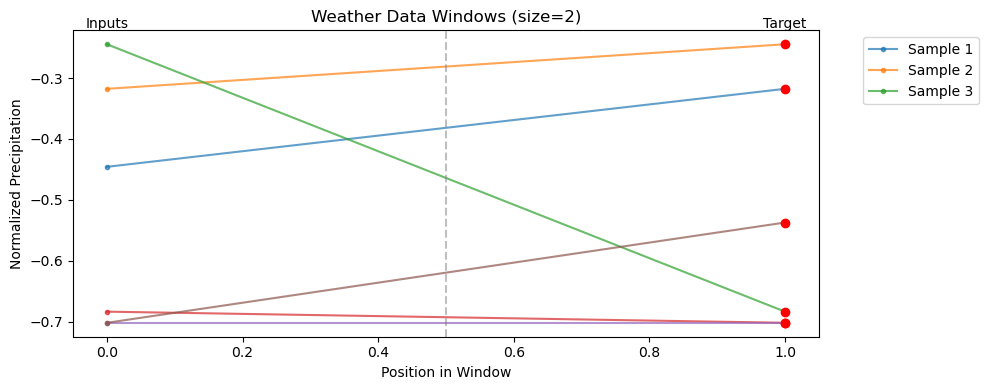

  ✓ Window size 2 test passed!

Testing window_size = 5
  Batch 1:
    Input shape: (3, 4) (expected: (3, 4))
    Target shape: (3,) (expected: (3,))
  Batch 2:
    Input shape: (3, 4) (expected: (3, 4))
    Target shape: (3,) (expected: (3,))


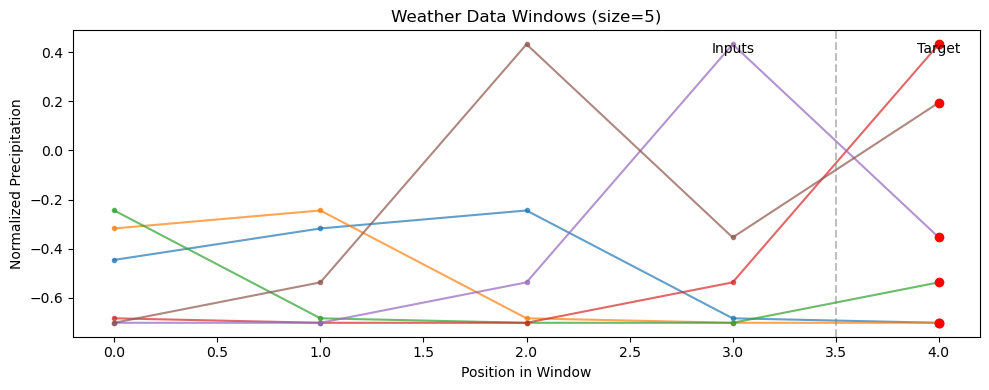

  ✓ Window size 5 test passed!

Testing window_size = 10
  Batch 1:
    Input shape: (3, 9) (expected: (3, 9))
    Target shape: (3,) (expected: (3,))
  Batch 2:
    Input shape: (3, 9) (expected: (3, 9))
    Target shape: (3,) (expected: (3,))


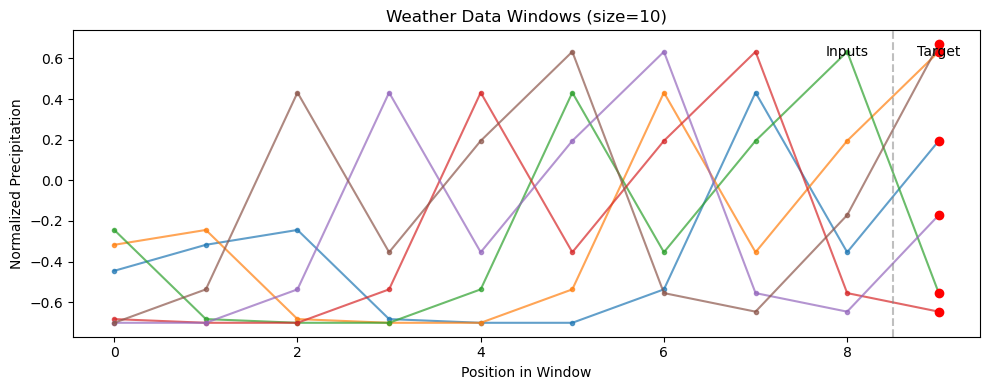

  ✓ Window size 10 test passed!

If all tests passed, your MetOfficeDataProvider is working correctly!


In [2]:
# Test your MetOfficeDataProvider implementation
# Note: Run this AFTER implementing MetOfficeDataProvider and restarting kernel

import matplotlib.pyplot as plt
import mlp.data_providers as data_providers
import numpy as np

print("Testing MetOfficeDataProvider implementation...")

# Test parameters
batch_size = 3
window_sizes = [2, 5, 10]

# Test each window size
for window_size in window_sizes:
    print(f"\nTesting window_size = {window_size}")
    
    try:
        # Create data provider
        met_dp = data_providers.MetOfficeDataProvider(
            window_size=window_size, 
            batch_size=batch_size,
            max_num_batches=2, 
            shuffle_order=False
        )
        
        # Create visualization
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.set_title(f'Weather Data Windows (size={window_size})')
        ax.set_xlabel('Position in Window')
        ax.set_ylabel('Normalized Precipitation')
        
        # Process batches
        for batch_num, (inputs, targets) in enumerate(met_dp):
            print(f"  Batch {batch_num + 1}:")
            print(f"    Input shape: {inputs.shape} (expected: {(batch_size, window_size-1)})")
            print(f"    Target shape: {targets.shape} (expected: {(batch_size,)})")
            
            # Validation checks
            expected_input_shape = (batch_size, window_size - 1)
            expected_target_shape = (batch_size,)
            
            assert inputs.shape == expected_input_shape, \
                f"Input shape mismatch: got {inputs.shape}, expected {expected_input_shape}"
            assert targets.shape == expected_target_shape, \
                f"Target shape mismatch: got {targets.shape}, expected {expected_target_shape}"
            
            # Plot windows (input + target as continuous sequences)
            for i in range(batch_size):
                # Combine input and target for plotting
                full_window = np.concatenate([inputs[i], [targets[i]]])
                x_coords = range(len(full_window))
                
                # Plot the sequence
                ax.plot(x_coords, full_window, '.-', alpha=0.7, 
                       label=f'Sample {i+1}' if batch_num == 0 else "")
                
                # Highlight the target (prediction point)
                ax.plot(window_size-1, targets[i], 'ro', markersize=6)
        
        if window_size == window_sizes[0]:  
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        ax.axvline(x=window_size-1.5, color='gray', linestyle='--', alpha=0.5)
        ax.text(window_size-2, ax.get_ylim()[1]*0.9, 'Inputs', ha='center', va='top')
        ax.text(window_size-1, ax.get_ylim()[1]*0.9, 'Target', ha='center', va='top')
        
        plt.tight_layout()
        plt.show()
        
        print(f"  ✓ Window size {window_size} test passed!")
        
    except Exception as e:
        print(f"  ❌ Error with window_size {window_size}: {e}")
        print(f"  Please check your MetOfficeDataProvider implementation")

print("\n" + "="*60)
print("If all tests passed, your MetOfficeDataProvider is working correctly!")